In [22]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as st

In [109]:
madeupslope=[45000, 55000, 65000, 85000, 88000, 112000]
madeupintercept=[-45000,-205000,-245000,-345000,-425000]
madeuplegend='Fine Art'

In [124]:
def intersection(a1:float,b1:float,a2:float,b2:float):
    #find the intersection of lines y1=a1*x+b1 and y2=a2*x+b2
    x=(b2-b1)/(a1-a2)
    y=a1*x+b1
    return(x,y)

In [311]:
def plotline(slope:list, yintercept:list,legend:str, percentile:float):
    #plot a line with known slope and y intercept
    undergrad_mean=(slope[1]+slope[0])/2
    undergrad_std=(slope[1]-slope[0])/2
    zscore=st.norm.ppf(percentile)
    slope1=undergrad_mean+(zscore*undergrad_std)
    
# Find the intersection of the lines.
    master_1 = intersection(slope1, yintercept[0], slope[2], yintercept[1])
    master_2 = intersection(slope1, yintercept[0], slope[3], yintercept[2]) 
    phd_1 = intersection(slope1, yintercept[0], slope[4], yintercept[3])
    phd_2 = intersection(slope1, yintercept[0], slope[5], yintercept[4])
    
# Dynamic Range for master degree plot to make the plot look more focused and nicer.
    master_axis_1 = master_1[0] 
    master_axis_2 = master_2[0] 
    master_axis = max(master_axis_1,master_axis_2)
    master_range = np.arange(2, master_axis+5 , 1)
    under_range_1 = np.arange(0, master_axis+5 , 1)

# Dynamic Range for Phd degree plot to make the plot look more focused and nicer.    
    phd_axis_1 = phd_1[0]
    phd_axis_2 = phd_2[0] 
    phd_axis = max(phd_axis_1, phd_axis_2)
    phd_range = np.arange(4, phd_axis+5 , 1)
    under_range_2 = np.arange(0, phd_axis+5 , 1)
    
# Undergrad Lines
    y1=under_range_1*slope1+yintercept[0]
    y11=under_range_2*slope1+yintercept[0]
    
# Master Lines
    y2=master_range*slope[2]+yintercept[1]
    y3=master_range*slope[3]+yintercept[2]
    
# Phd Lines 
    y4=phd_range*slope[4]+yintercept[3]
    y5=phd_range*slope[5]+yintercept[4]
    
    
    plt.plot(under_range_1, y1,'b-.',label=f"Undergrad Income At {round(percentile*100, 1)} Percentile",linewidth=4,)
    plt.plot(master_range, y3 ,'r',label="Master Income + Standard Deviation",linewidth=2,)
    plt.plot(master_range, y2 ,'m',label="Master Income - Standard Deviation",linewidth=2,)
    
    
    plt.tight_layout() 
    plt.legend()
    plt.title(f"{legend} Undergrad vs Master Income") 
    plt.xlabel(f"It will take {int(master_2[0])} to {int(master_1[0])} Years to Break Even with {round(percentile*100, 1)}% of Undergrad \nYears Out of College")
    plt.ylabel("Accumulate Income $")
    # Set the starting range from 0 to make plot look better.
    plt.xlim(0, max(master_range))
    plt.hlines(y=master_2[1], xmin=0, xmax=master_2[0], linewidth=2, color='darkgreen', linestyles='dotted')
    plt.hlines(y=master_1[1], xmin=0, xmax=master_1[0], linewidth=2, color='darkgreen', linestyles='dotted')
    
    # Need to get ymax because for axvline ymax is a fraction of the y max value, so ymax>=1 would plot to the top.
    xmin, xmax, ymin, ymax = plt.axis()
    plt.axvline(x=master_2[0], ymin=0, ymax=(master_2[1]/ymax),color='darkgreen', linestyle = '--')
    plt.axvline(x=master_1[0], ymin=0, ymax=(master_1[1]/ymax),color='darkgreen', linestyle = '--')   
    
    plt.scatter(master_2[0],master_2[1],marker="X", c='darkgreen',s=500)
    plt.scatter(master_1[0],master_1[1],marker="X", c='darkgreen',s=500)
    
    plt.figure()
    plt.plot(under_range_2,y11,'b-.',label=f"Undergrad Income At {round(percentile*100, 1)} Percentile",linewidth=4,)
    plt.plot(phd_range,y5,'r',label="Phd Income + Standard Deviation",linewidth=2,)
    plt.plot(phd_range,y4,'m',label="Phd Income - Standard Deviation",linewidth=2,)
    
    plt.tight_layout() 
    plt.legend()
    plt.title(f"{legend} Undergrad vs Phd Income") 
    plt.xlabel(f"It will take {int(phd_2[0])} to {int(phd_1[0])} Years to Break Even with {round(percentile*100, 1)}% of Undergrad \nYears Out of College")
    plt.ylabel("Accumulate Income $") 
    # Set the starting range from 0 to make plot look better.
    plt.xlim(0, max(phd_range))
    plt.hlines(y=phd_2[1], xmin=0, xmax=phd_2[0], linewidth=2, color='darkgreen', linestyles='dotted')
    plt.hlines(y=phd_1[1], xmin=0, xmax=phd_1[0], linewidth=2, color='darkgreen', linestyles='dotted')
    
    # Need to get ymax because for axvline ymax is a fraction of the y max value, so ymax>=1 would plot to the top.
    xmin, xmax, ymin, ymax = plt.axis()
    plt.axvline(x=phd_2[0], ymin=0, ymax=(phd_2[1]/ymax),color='darkgreen', linestyle = '--')
    plt.axvline(x=phd_1[0], ymin=0, ymax=(phd_1[1]/ymax),color='darkgreen', linestyle = '--') 
    
    plt.scatter(phd_2[0],phd_2[1],marker="X", c='darkgreen',s=500)
    plt.scatter(phd_1[0],phd_1[1],marker="X", c='darkgreen',s=500)


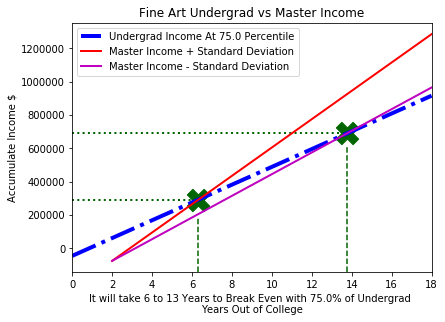

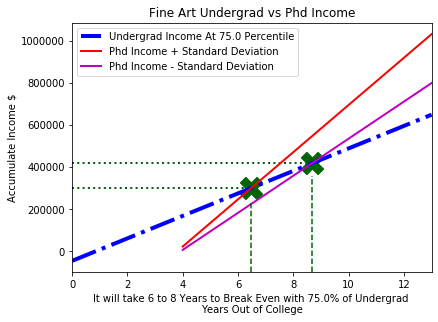

In [312]:
plotline(madeupslope,madeupintercept,madeuplegend, .75)

In [25]:
# takes in the 1 by 6 list of [undergrad_income+-undergrad_income_std, master_income+-master_income_std, Phd_income+-Phd_income_std]
# from the previous function as slope, and point would be coordinates of
# [undergrad_tuition,undergrad_years,master_tuition,master_years,Phd_tuition,Phd_years]
# and returns the y intercet (x=0) of the lines of the six lines we are plotting for each major.

# def yintercept(slopes:list, points:list):

  
    

In [24]:
# takes in a dictionary of the format {major_name:[undergrad_income, undergrad_income_std, master_income, master_income_std,
# Phd_income, Phd_income_std], and so on}. And returns the major names as a list, and another list of 
# [undergrad_income+-undergrad_income_std, master_income+-master_income_std, Phd_income+-Phd_income_std]
# +- means plus and minus so the array is 1 by 6 for each major.
# def processdata(data:dict):
#     keys=list(data.keys())

#     return keys

In [23]:
# # make up a data before team mates finish their analysis of the data frame
# madeupdata={'Fine Art':[50000,5000,75000,10000,100000,12000],'Engineering':[80000,12000,150000,30000,179000,45000], 
#             'Video Gaming':[46000,3200,89000,4500,123000,9500]}
# madeuplist=['Fine Art', 'Engineering', 'Video Gaming']
# madeupslope=[ [45000, 55000, 65000, 85000, 88000, 112000], [68000, 92000, 120000, 180000, 134000,224000],[41800, 49200, 84500, 93500, 132500]]
